### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## 1. Análise do faturamento



In [2]:
lojas=(loja1,loja2,loja3,loja4)
nome_lojas=['Loja 1','Loja 2','Loja 3','Loja 4']
faturamentos=[]

for loja in lojas:
    faturamentos.append(loja.Preço.sum())

In [3]:
#for loja in lojas:
    #print(loja.isnull().sum())

In [4]:
mediaFaturamentos=sum(faturamentos)/len(faturamentos)
print(mediaFaturamentos)

1467872.6975


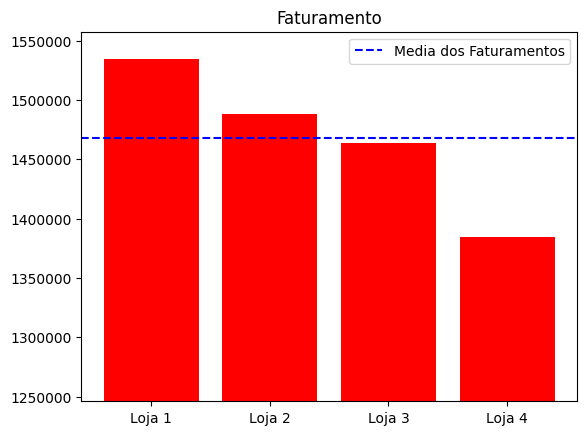

In [5]:
plt.bar(nome_lojas,faturamentos,color='red')
plt.title('Faturamento')
plt.axhline(y=mediaFaturamentos,color='blue',linestyle='--',label='Media dos Faturamentos')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(min(faturamentos)*0.9,max(faturamentos)*1.015)
plt.legend()
plt.show()

In [6]:
for i in range(4):
    var=(faturamentos[i]-mediaFaturamentos)/mediaFaturamentos*100
    print(f'A Loja {i+1} faturou R${faturamentos[i]} que varia {var:.2f}% da media dos faturamentos')

A Loja 1 faturou R$1534509.12 que varia 4.54% da media dos faturamentos
A Loja 2 faturou R$1488459.06 que varia 1.40% da media dos faturamentos
A Loja 3 faturou R$1464025.03 que varia -0.26% da media dos faturamentos
A Loja 4 faturou R$1384497.58 que varia -5.68% da media dos faturamentos


A Loja 1 possui o faturamento de $R\$1534509.12$, a maior entre as demais.

Já a loja 4 possui o faturamento de $R\$1384497.58$, sendo o menor faturamento.

# 2. Vendas por Categoria

In [7]:

loja1['Categoria do Produto'].unique()
loja4['Categoria do Produto'].value_counts().sort_values(ascending=False)

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64

In [8]:
lista_contagem=[]

for loja,nome in zip(lojas,nome_lojas):
    contagemCategoria=loja['Categoria do Produto'].value_counts().sort_values(ascending=False)
    contagemCategoria.name=nome
    lista_contagem.append(contagemCategoria)
    maisVendidos=contagemCategoria.nlargest(2)
    menosVendidos=contagemCategoria.idxmin()
    print(f'A {nome} tem {maisVendidos.index[0]} e {maisVendidos.index[1]} como mais vendidos e {menosVendidos} como a categoria menos vendida')


contagemProdutos=pd.concat(lista_contagem,axis=1)
contagemProdutos

A Loja 1 tem moveis e eletronicos como mais vendidos e utilidades domesticas como a categoria menos vendida
A Loja 2 tem moveis e eletronicos como mais vendidos e utilidades domesticas como a categoria menos vendida
A Loja 3 tem moveis e eletronicos como mais vendidos e instrumentos musicais como a categoria menos vendida
A Loja 4 tem moveis e eletronicos como mais vendidos e instrumentos musicais como a categoria menos vendida


,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


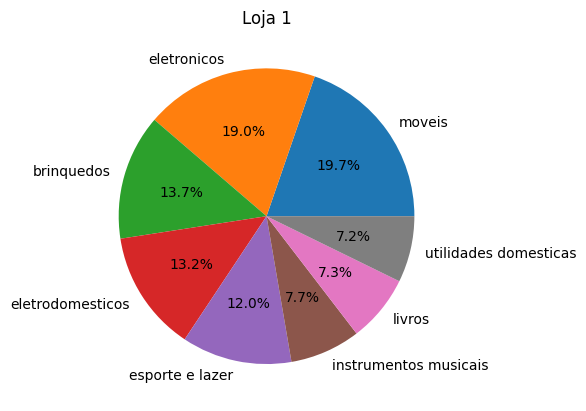

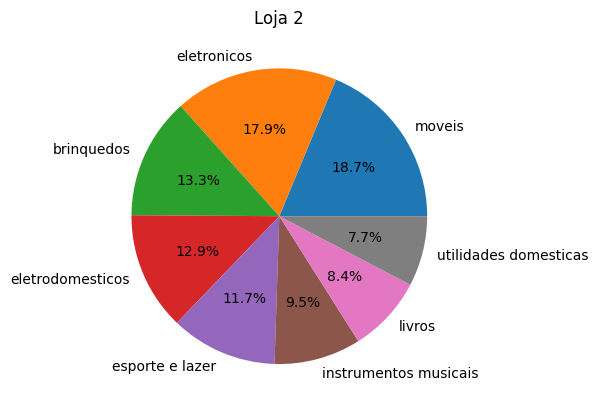

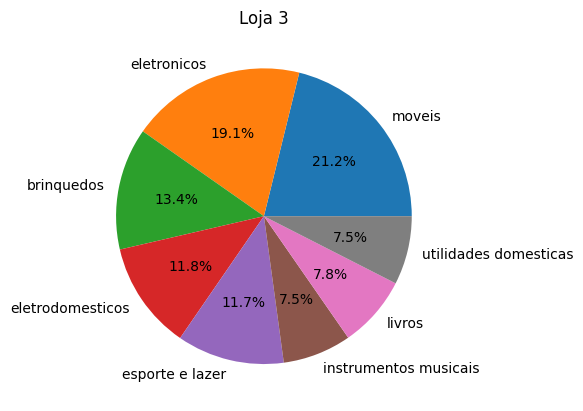

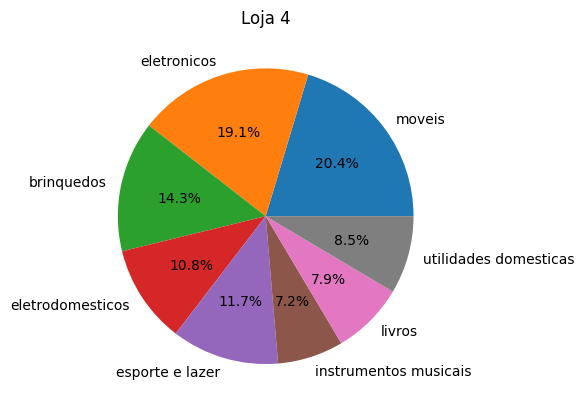

In [9]:
for coluna in nome_lojas:
    contagemProdutos[coluna].plot(kind='pie',autopct='%.1f%%')
    plt.title(coluna)
    plt.ylabel('')
    plt.show()


# 3. Média de Avaliação das Lojas


In [10]:
lista_avaliacoes=[]

for loja,nome in zip(lojas,nome_lojas):
    avaliacao=loja['Avaliação da compra'].mean()
    lista_avaliacoes.append(avaliacao)

    media_das_medias=sum(lista_avaliacoes)/len(lista_avaliacoes)
    var=(avaliacao-media_das_medias)/media_das_medias*100

    print(f'A {nome} tem avaliação {avaliacao:.2f} com {var:.1f}% de variancia')

print(f"A média das médias das avaliações é: {media_das_medias:2f}")

A Loja 1 tem avaliação 3.98 com 0.0% de variancia
A Loja 2 tem avaliação 4.04 com 0.8% de variancia
A Loja 3 tem avaliação 4.05 com 0.7% de variancia
A Loja 4 tem avaliação 4.00 com -0.5% de variancia
A média das médias das avaliações é: 4.014518


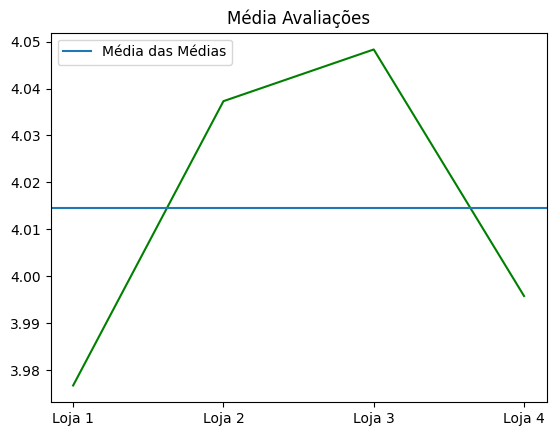

In [11]:
plt.plot(nome_lojas,lista_avaliacoes,color='green')
plt.axhline(y=media_das_medias,label='Média das Médias')
plt.title('Média Avaliações')
plt.legend()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [21]:
contagem_lojas=[]

for loja,nome in zip(lojas,nome_lojas):
    lojaContagem=loja['Produto'].value_counts()
    topVendas=lojaContagem.idxmax()
    botVendas=lojaContagem.idxmin()

    lojaContagem.name=nome
    contagem_lojas.append(lojaContagem)

    print(f'Para a {nome} {topVendas} foi o produto mais vendido e {botVendas} o menos vendido')


Para a Loja 1 Micro-ondas foi o produto mais vendido e Headset o menos vendido
Para a Loja 2 Iniciando em programação foi o produto mais vendido e Jogo de tabuleiro o menos vendido
Para a Loja 3 Kit banquetas foi o produto mais vendido e Blocos de montar o menos vendido
Para a Loja 4 Cama box foi o produto mais vendido e Guitarra o menos vendido


In [22]:
dfContagemProdutos=pd.concat(contagem_lojas,axis=1)
dfContagemProdutos

,Loja 1,Loja 2,Loja 3,Loja 4
Produto,,,,
Micro-ondas,60,62,36,48
TV Led UHD 4K,60,45,42,40
Guarda roupas,60,54,49,34
Secadora de roupas,58,57,45,40
Cômoda,56,44,55,55
Blocos de montar,56,54,35,54
Bola de basquete,55,42,50,50
Bicicleta,54,45,52,45
Copo térmico,54,47,38,48


# 5. Frete Médio por Loja

In [14]:
listaFrete=[]
fretes=[]

for loja,nome in zip(lojas,nome_lojas):
    freteMedio=loja['Frete'].mean()
    serieFrete=pd.Series({nome:freteMedio})
    listaFrete.append(serieFrete)
    fretes.append(freteMedio)

dfFrete=pd.concat(listaFrete,axis=0).to_frame(name='Frete')
dfFrete

,Frete
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


In [15]:
total=[]

for loja in lojas:
    total.append(loja['Frete'])

freteTodas=pd.concat(total,axis=0)
mediaFreteGeral=freteTodas.mean()
print(f'O frete médio é {mediaFreteGeral:.2f}, considerando todas as vendas')

O frete médio é 33.17, considerando todas as vendas


In [16]:

for loja in nome_lojas:
    freteLoja=dfFrete.loc[loja,'Frete']
    var=(freteLoja-mediaFreteGeral)/mediaFreteGeral*100

    print(f'A {loja} tem o frete médio de {freteLoja:.2f} que varia {var:.2f}% do frete médio geral')

A Loja 1 tem o frete médio de 34.69 que varia 4.60% do frete médio geral
A Loja 2 tem o frete médio de 33.62 que varia 1.37% do frete médio geral
A Loja 3 tem o frete médio de 33.07 que varia -0.28% do frete médio geral
A Loja 4 tem o frete médio de 31.28 que varia -5.69% do frete médio geral


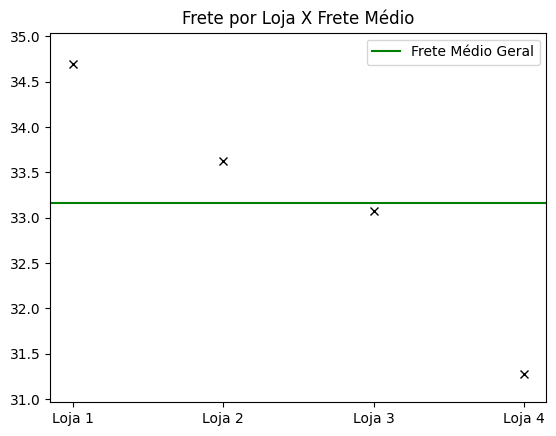

In [17]:
plt.plot(nome_lojas,fretes,linestyle='none',marker='x',color='black')
plt.axhline(y=mediaFreteGeral,label='Frete Médio Geral',color='green')
plt.title('Frete por Loja X Frete Médio')
plt.legend()
plt.ylim(min(fretes)*0.99,max(fretes)*1.01)
plt.show()

# Mapa de Calor

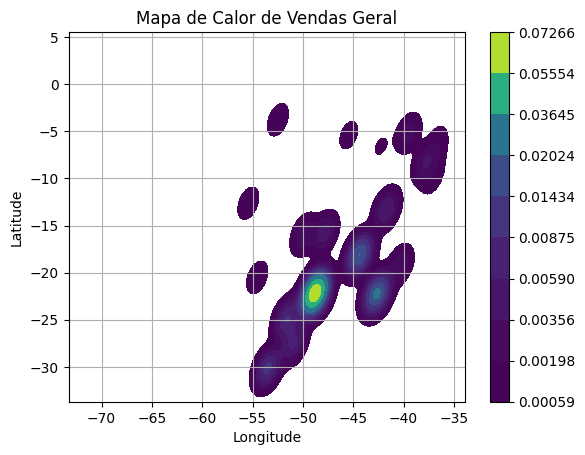

In [18]:
dfCalor=[]

for loja in lojas:
    lojaCalor=loja[['lat','lon']]
    dfCalor.append(lojaCalor)

heatmap=pd.concat(dfCalor,axis=0,ignore_index=True)

sns.kdeplot(data=heatmap,x='lon',y='lat',fill=True,cmap='viridis',cbar=True)      
plt.title('Mapa de Calor de Vendas Geral')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True) 
plt.show()

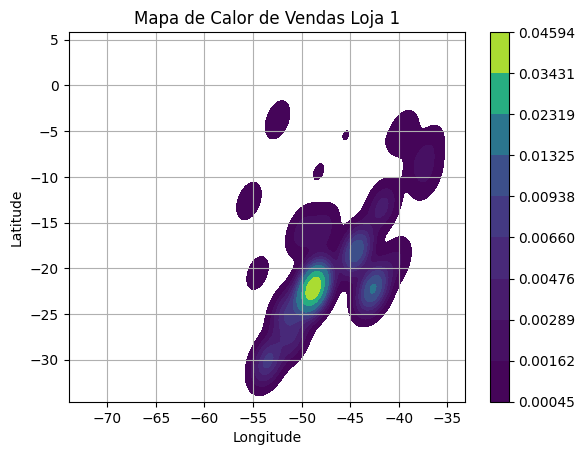

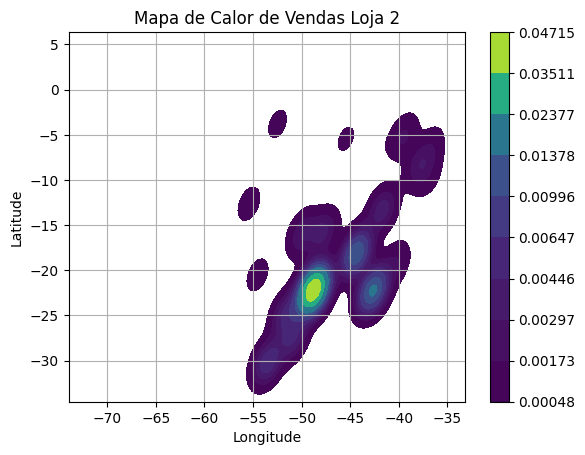

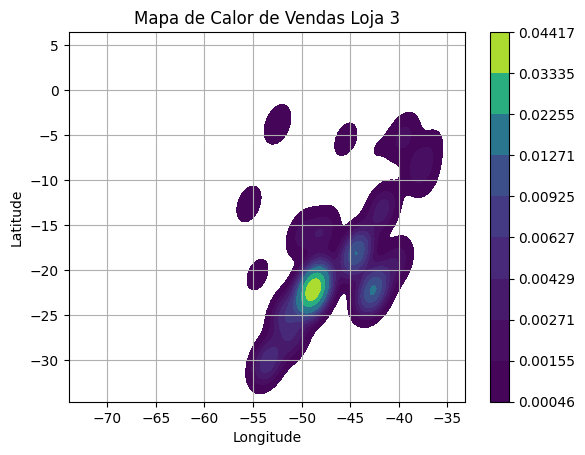

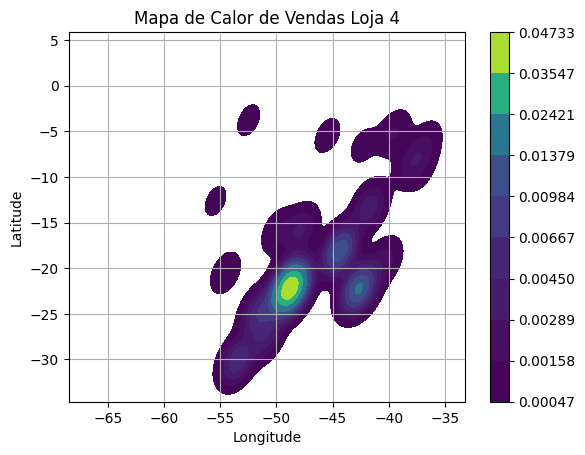

In [19]:
for loja,nome in zip(lojas,nome_lojas):
    lojaCalor=loja[['lat','lon']]

    sns.kdeplot(data=lojaCalor,x='lon',y='lat',fill=True,cmap='viridis',cbar=True)      
    plt.title(f'Mapa de Calor de Vendas {nome}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True) 
    plt.show()

# Análise

O objetivo desta análise é escolher qual loja o senhor João deve vender. Essa escolha se baseia no faturamento total, categorias mais e menos vendidas, média das avaliações, produtos mais e menos vendidos e o frete médio de cada loja

### Faturamento

- Destaque: A loja 1 possui o maior faturamento com $4,5\%$ acima da média.

- Destaque: A loja 4 possui o menor faturamento com $5,7\%$ abaixo da média.

- Já a loja 2 está $1,4\%$ acima da média e a loja 3 está pouco abaixo da média.

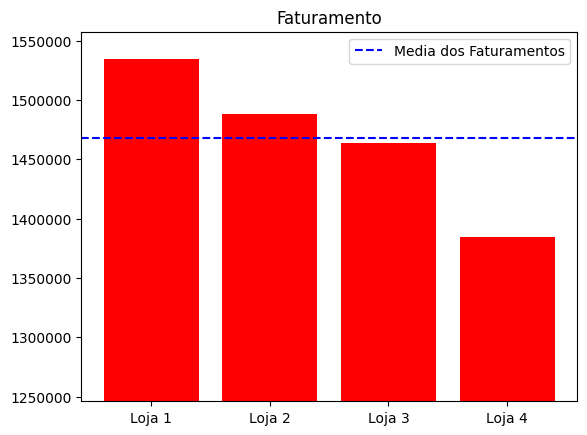

### Categorias mais e Menos Vendidas

Todas as lojas têm moveis e eletronicos como mais vendidos.

As lojas 1 e 2 têm utilidades domesticas como a categoria menos vendida

As lojas 3 e 4 têm instrumentos musicais como a categoria menos vendida

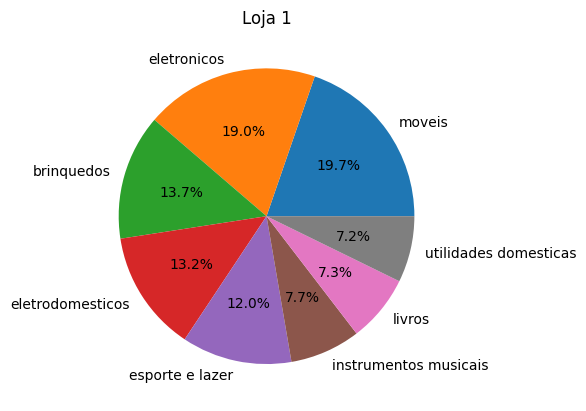
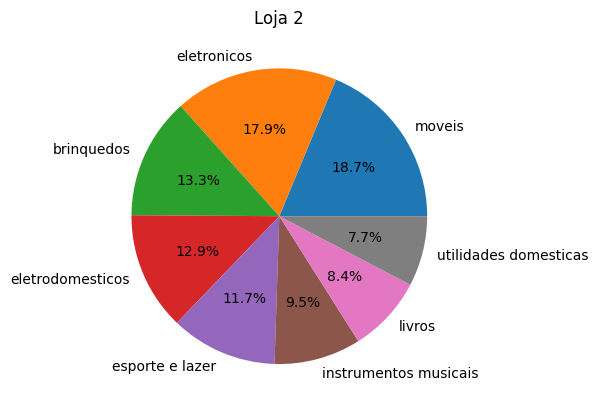
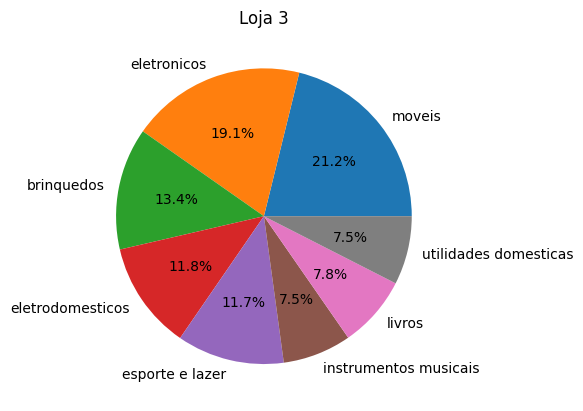
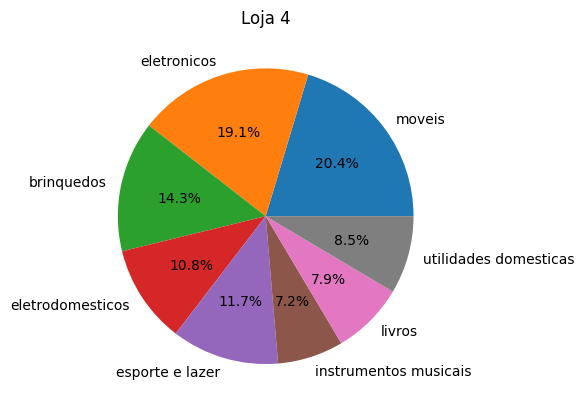

In [20]:
contagemProdutos

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


### Média das Avaliações dos Clientes

Todas as lojas estão bem proximas da média das avaliações médias.

Destaque: A loja 3 é a com a melhor avaliação $0,8\%$ acima da média das médias, já a loja 4 é a com a pior avalição $0,5\%$ abaixo.

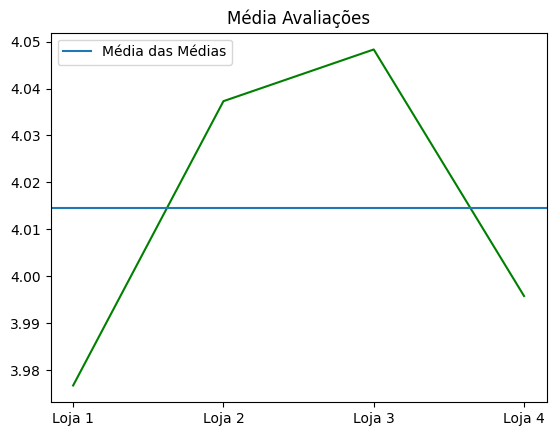

### Produtos Mais e Menos Vendidos

- A loja 1 teve o micro-ondas como mais vendido e o headset como menos vendido.

- A loja 2 teve iniciando em programação como mais vendido e o jogo de tabuleiro como menos vendido.

- A loja 3 teve kit banquetas como mais vendido e blocos de montar como menos vendido.

- A loja 4 teve cama box como mais vendido e guitarra como menos vendido.

Destaques:
- Apenas a loja 4 tem como item mais vendido um produto que está na sua categoria mais vendida.

- Apenas a loja 4 tem como item menos vendido um produto que está na sua categoria menos vendida.

In [24]:
dfContagemProdutos.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Produto,,,,
Micro-ondas,60,62,36,48
TV Led UHD 4K,60,45,42,40
Guarda roupas,60,54,49,34
Secadora de roupas,58,57,45,40
Cômoda,56,44,55,55


### Frete Médio